
Treinando MODELO_PIB_PRED


C:\Users\breno\AppData\Local\Temp\ipykernel_4108\4244265931.py:62: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_f['target'] = df_f.groupby('Município')[alvo].shift(-1)
[I 2025-06-30 22:55:50,323] A new study created in memory with name: no-name-ae0e84d7-2f6b-41ae-b358-4e8c7481cf58
[I 2025-06-30 22:55:53,325] Trial 0 finished with value: 466976255.1942294 and parameters: {'lr': 0.06762814935293257, 'leaves': 65, 'ff': 0.758307374298281, 'bf': 0.956679151514158, 'b_freq': 2, 'min_leaf': 65, 'l1': 0.38364817033539356, 'l2': 0.6331700597490069}. Best is trial 0 with value: 466976255.1942294.
[I 2025-06-30 22:55:57,454] Trial 1 finished with value: 376092230.91565853 and parameters: {'lr': 0.08870738177490026, 'leaves': 166, 'ff': 0.9677649771711667, 'bf': 0.6658591800126988, 'b_freq': 7, 'min_leaf

Melhor RMSE-Val: 376,092,230.92
--> TEST RMSE: 1,646,838,222.62 | R²: 0.499


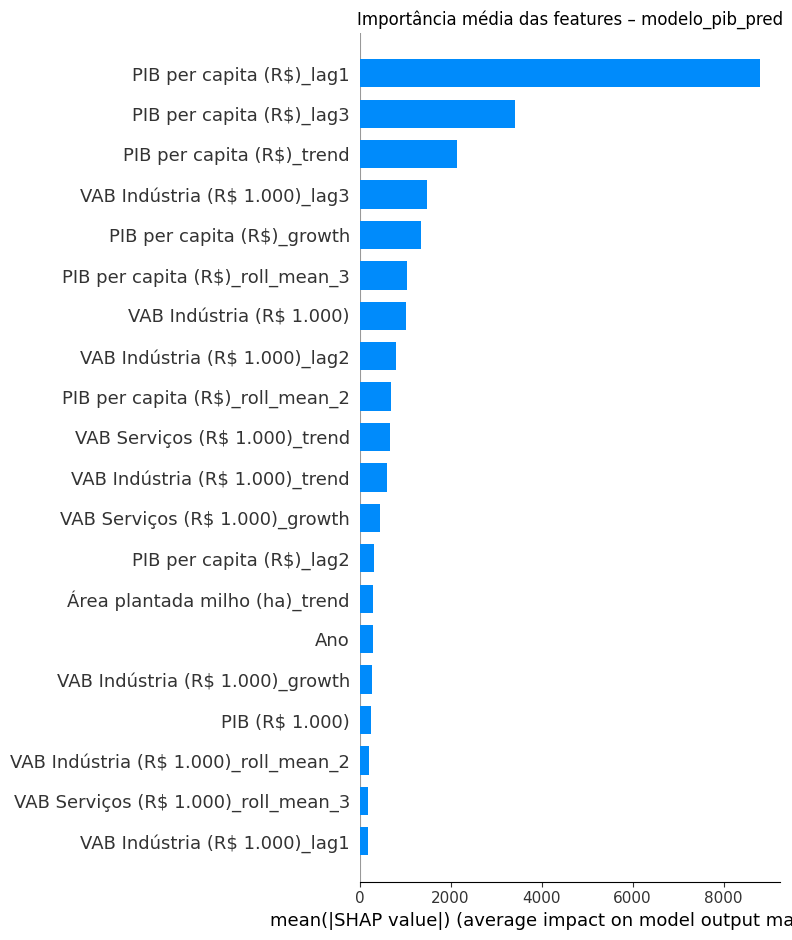


Treinando MODELO_VAB_PRED


C:\Users\breno\AppData\Local\Temp\ipykernel_4108\4244265931.py:62: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_f['target'] = df_f.groupby('Município')[alvo].shift(-1)
[I 2025-06-30 22:56:00,597] A new study created in memory with name: no-name-6ad80778-9aac-41f4-b1d3-a2c0f1dc8d13
[I 2025-06-30 22:56:17,995] Trial 0 finished with value: 1897832217.3352454 and parameters: {'lr': 0.04810761664186057, 'leaves': 193, 'ff': 0.895318908623323, 'bf': 0.977338192312937, 'b_freq': 5, 'min_leaf': 28, 'l1': 0.7364246701308094, 'l2': 0.03501057842548656}. Best is trial 0 with value: 1897832217.3352454.
[I 2025-06-30 22:56:20,982] Trial 1 finished with value: 3246445311.826222 and parameters: {'lr': 0.023756031877938365, 'leaves': 133, 'ff': 0.8351302239220821, 'bf': 0.6477630702319859, 'b_freq': 7, 'min_l

Melhor RMSE-Val: 1,897,832,217.34
--> TEST RMSE: 2,349,151,424.16 | R²: 0.929


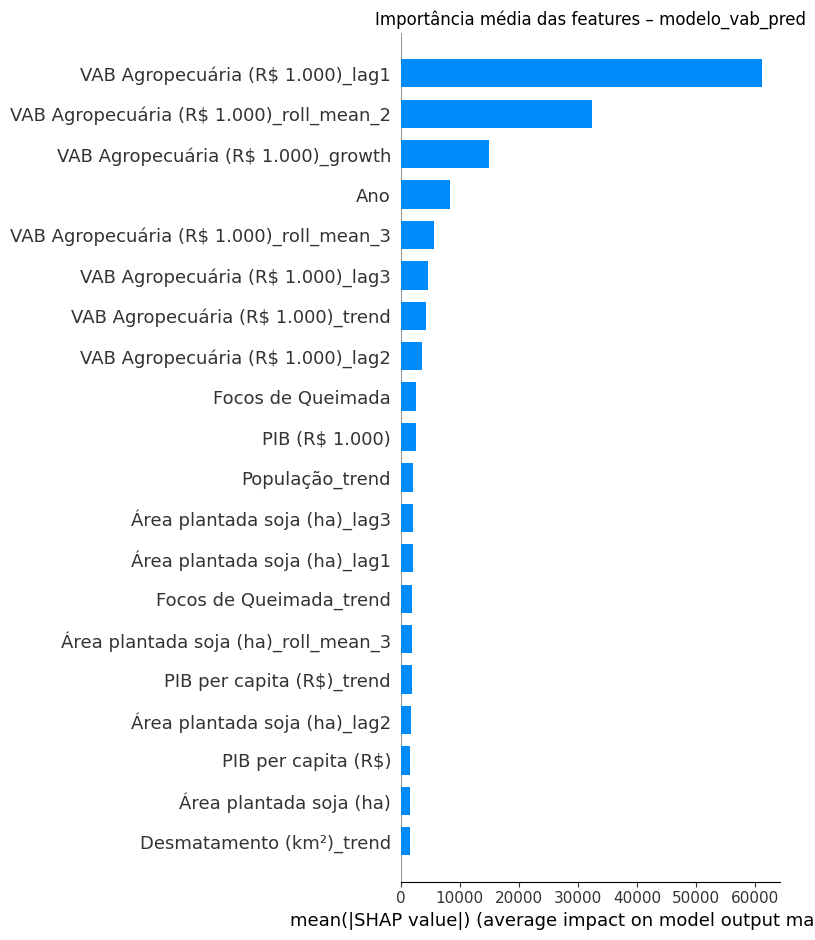


Treinando MODELO_BENEFICIOS_PRED


C:\Users\breno\AppData\Local\Temp\ipykernel_4108\4244265931.py:29: FutureWarning: The default fill_method='ffill' in SeriesGroupBy.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df[f'{col}_growth'] = df.groupby('Município', observed=True)[col].pct_change()
C:\Users\breno\AppData\Local\Temp\ipykernel_4108\4244265931.py:62: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_f['target'] = df_f.groupby('Município')[alvo].shift(-1)
[I 2025-06-30 22:56:27,003] A new study created in memory with name: no-name-7bdda429-9374-48ba-adf2-5cfdca5b34ae
[I 2025-06-30 22:56:29,952] Trial 0 finished with value: 6551460.376252073 and parameters: {'lr': 0.045278211377424625, 'l

Melhor RMSE-Val: 6,551,460.38
--> TEST RMSE: 8,764,650.94 | R²: 0.934


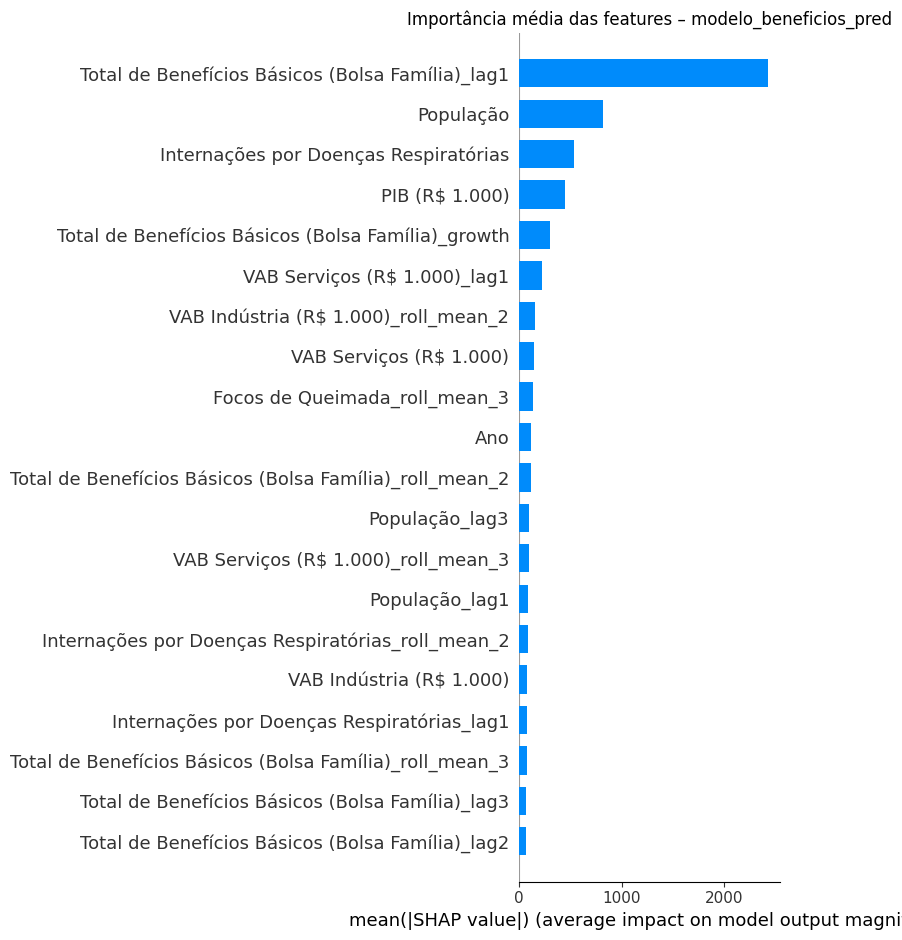


Treinando MODELO_RESPIRATORIO_PRED


C:\Users\breno\AppData\Local\Temp\ipykernel_4108\4244265931.py:29: FutureWarning: The default fill_method='ffill' in SeriesGroupBy.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df[f'{col}_growth'] = df.groupby('Município', observed=True)[col].pct_change()
C:\Users\breno\AppData\Local\Temp\ipykernel_4108\4244265931.py:62: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_f['target'] = df_f.groupby('Município')[alvo].shift(-1)
[I 2025-06-30 22:56:39,242] A new study created in memory with name: no-name-0f496528-3741-446d-b267-2f668ce7e02f
[I 2025-06-30 22:56:40,583] Trial 0 finished with value: 8876905.755421294 and parameters: {'lr': 0.044288373104402076, 'l

Melhor RMSE-Val: 8,339,963.77
--> TEST RMSE: 22,835,900.81 | R²: 0.856


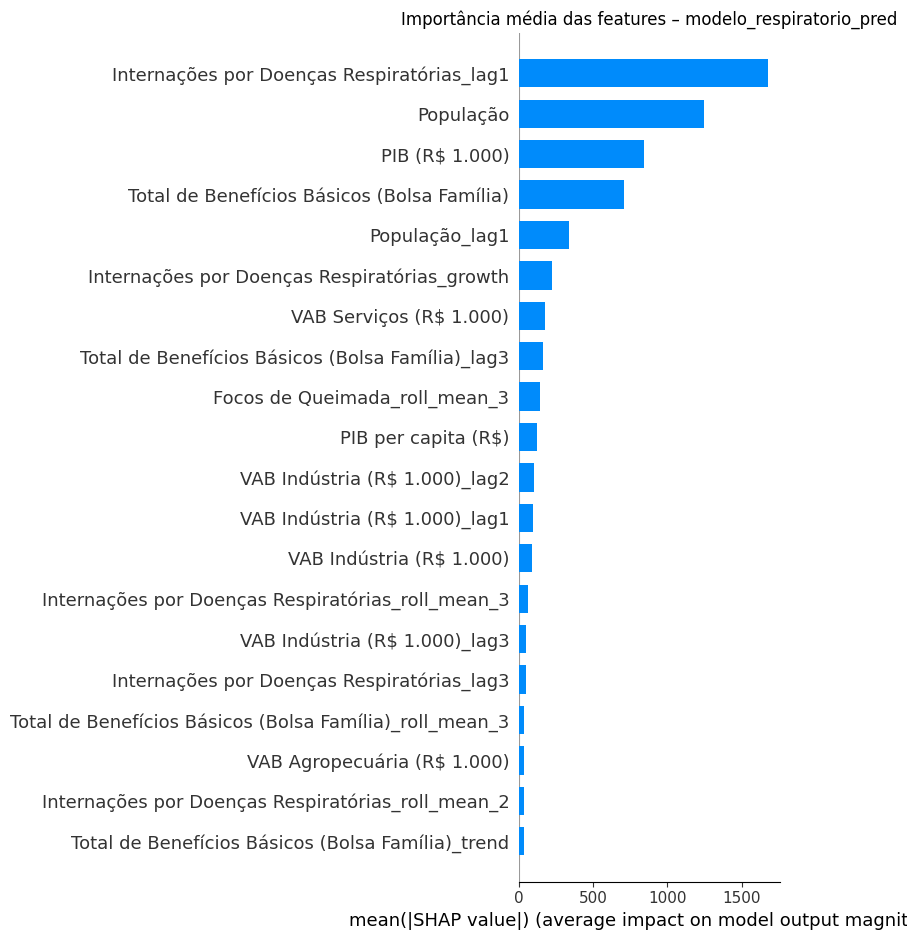


🎉  TODOS OS MODELOS AJUSTADOS E SALVOS EM: ../models/


In [ ]:
import os, gc, joblib, shap, optuna
import numpy as np
import pandas as pd
import lightgbm as lgb
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# ------------------------- CONFIGS GERAIS ------------------------------- #
DATA_DIR   = '../data/RESULTADOS/'
MODELS_DIR = '../models/'
os.makedirs(MODELS_DIR, exist_ok=True)


# ------------------------- FUNÇÕES AUXILIARES --------------------------- #
def carregar_dados(fp:str) -> pd.DataFrame:
    df = pd.read_csv(fp).sort_values(['Município','Ano']).reset_index(drop=True)
    df['Município'] = df['Município'].astype('category')
    return df


def criar_features(df:pd.DataFrame, cols_lag, n_lags=3, janelas=(2,3)):
    df = df.copy()
    for col in cols_lag:
        for lag in range(1, n_lags+1):
            # ADICIONE observed=True AQUI
            df[f'{col}_lag{lag}'] = df.groupby('Município', observed=True)[col].shift(lag)
            
        # ADICIONE observed=True AQUI
        df[f'{col}_growth'] = df.groupby('Município', observed=True)[col].pct_change()

        for w in janelas:
            # ADICIONE observed=True AQUI
            df[f'{col}_roll_mean_{w}'] = (
                df.groupby('Município', observed=True)[col].shift(1).rolling(w).mean()
            )
            
    # tendência linear simples (regressão nos últimos 3 valores)
    for col in cols_lag:
        # ADICIONE observed=True AQUI
        df[f'{col}_trend'] = (
            df.groupby('Município', observed=True)[col]
            .apply(lambda s: s.shift(1).rolling(3).apply(
                lambda x: np.polyfit(range(len(x)), x, 1)[0] if x.count()==3 else np.nan))
            .reset_index(level=0, drop=True)
        )
        
    df.replace([np.inf, -np.inf], 0, inplace=True)
    return df


def split_temporal(df, ano_train_fim=2020, ano_val=2021):
    mask_train = df['Ano'] <= ano_train_fim
    mask_val   = df['Ano'] == ano_val
    mask_test  = df['Ano'] >  ano_val          # 2022 em diante

    return (df[mask_train], df[mask_val], df[mask_test])


def treinar_modelo(df, alvo, feat_list, nome_modelo):
    df_f = criar_features(df, feat_list, n_lags=3)
    # target t+1
    df_f['target'] = df_f.groupby('Município')[alvo].shift(-1)
    df_f = df_f.dropna(subset=['target'])

    train, val, test = split_temporal(df_f)

    cols_to_drop = ['target', alvo]

    y_train, X_train = train['target'], train.drop(columns=cols_to_drop, errors='ignore')
    y_val,   X_val   = val  ['target'], val  .drop(columns=cols_to_drop, errors='ignore')
    y_test,  X_test  = test ['target'], test .drop(columns=cols_to_drop, errors='ignore')
    

    cat_cols = ['Município']
    for c in cat_cols:
        if c in X_train.columns:
            X_train[c] = X_train[c].cat.codes
            X_val[c]   = X_val[c].cat.codes
            X_test[c]  = X_test[c].cat.codes

    # --------- Hyper-parameter tuning rápido via Optuna ---------- #
    def objective(trial):
        params = {
            'objective':        'rmse',
            'metric':           'rmse',
            'boosting_type':    'gbdt',
            'learning_rate':    trial.suggest_float('lr', 0.01, 0.15, log=True),
            'num_leaves':       trial.suggest_int('leaves', 31, 256),
            'feature_fraction': trial.suggest_float('ff', 0.6, 1.0),
            'bagging_fraction': trial.suggest_float('bf', 0.6, 1.0),
            'bagging_freq':     trial.suggest_int('b_freq', 1, 7),
            'min_data_in_leaf': trial.suggest_int('min_leaf', 10, 100),
            'lambda_l1':        trial.suggest_float('l1', 0.0, 0.8),
            'lambda_l2':        trial.suggest_float('l2', 0.0, 0.8),
            'seed':             42,
            'verbose':          -1,
            'n_estimators':     5000,
        }
        mdl = lgb.LGBMRegressor(**params)
        mdl.fit(X_train, y_train,
                eval_set=[(X_val, y_val)],
                eval_metric='rmse',
                callbacks=[lgb.early_stopping(300, verbose=False)])
        pred = mdl.predict(X_val)
        return mean_squared_error(y_val, pred)

    study = optuna.create_study(direction='minimize')
    study.optimize(objective, n_trials=2, show_progress_bar=False)

    print(f"Melhor RMSE-Val: {study.best_value:,.2f}")
    best_params = study.best_params | {
        'objective':'rmse', 'metric':'rmse', 'verbose':-1, 'n_estimators':5000, 'seed':42
    }
    model = lgb.LGBMRegressor(**best_params)
    model.fit(X_train, y_train,
              eval_set=[(X_val, y_val)],
              eval_metric='rmse',
              callbacks=[lgb.early_stopping(300, verbose=False)])

    # --------- Avaliação final no TESTE (2022) -------- #
    pred_test = model.predict(X_test)
    rmse = mean_squared_error(y_test, pred_test)
    r2   = r2_score(y_test, pred_test)
    print(f'--> TEST RMSE: {rmse:,.2f} | R²: {r2:.3f}')

    # --------- Salvar artefatos -------- #
    m_path = os.path.join(MODELS_DIR, f'{nome_modelo}.joblib')
    c_path = os.path.join(MODELS_DIR, f'{nome_modelo}_cols.joblib')
    joblib.dump(model, m_path)
    joblib.dump(X_train.columns.tolist(), c_path)

    # --------- SHAP (debug) -------- #
    explainer = shap.TreeExplainer(model)
    shap_values = explainer(X_val.iloc[:1000])   # amostra p/ velocidade
    shap.summary_plot(shap_values, X_val.iloc[:1000], show=False, plot_type='bar')
    plt.title(f'Importância média das features – {nome_modelo}')
    plt.tight_layout(); plt.show()

    return model


# ------------------------- EXECUÇÃO ------------------------------------- #
if __name__ == '__main__':
    df = carregar_dados(os.path.join(DATA_DIR, 'df_final2.csv'))

    # Definindo as listas de features para cada modelo
    FEATURES_PIB = [
        'VAB Agropecuária (R$ 1.000)', 'VAB Indústria (R$ 1.000)', 'VAB Serviços (R$ 1.000)',
        'Área plantada soja (ha)', 'Área plantada milho (ha)', 'Total Rebanho (Bovino)',
        'Desmatamento (km²)', 'Focos de Queimada', 'Total de Benefícios Básicos (Bolsa Família)'
    ]
    FEATURES_AGRO = [
        'Total Rebanho (Bovino)', 'Área plantada soja (ha)', 'Área plantada milho (ha)',
        'Desmatamento (km²)', 'Focos de Queimada', 'PIB per capita (R$)',
        'VAB Indústria (R$ 1.000)', 'VAB Serviços (R$ 1.000)', 'População'
    ]
    FEATURES_BENEFICIOS = [
        'PIB per capita (R$)', 'VAB Agropecuária (R$ 1.000)', 'VAB Indústria (R$ 1.000)',
        'VAB Serviços (R$ 1.000)', 'População', 'Internações por Doenças Respiratórias', 'Focos de Queimada'
    ]
    FEATURES_RESP = [
        'Focos de Queimada', 'Desmatamento (km²)', 'VAB Indústria (R$ 1.000)',
        'População', 'PIB per capita (R$)', 'Total de Benefícios Básicos (Bolsa Família)'
    ]

    mapas = [
        # O segundo elemento da tupla agora é a lista de features que definimos
        ('PIB per capita (R$)',                        FEATURES_PIB, 'modelo_pib_pred'),
        ('VAB Agropecuária (R$ 1.000)',               FEATURES_AGRO, 'modelo_vab_pred'),
        ('Total de Benefícios Básicos (Bolsa Família)',FEATURES_BENEFICIOS,  'modelo_beneficios_pred'),
        ('Internações por Doenças Respiratórias',     FEATURES_RESP, 'modelo_respiratorio_pred')
    ]

    for alvo, feats, nome in mapas:
        print('\n' + '='*90)
        print(f'Treinando {nome.upper()}')
        # A função criar_features usará a lista 'feats' para criar lags/trends apenas dessas colunas
        # E também criará lags/trends para a coluna 'alvo', o que é o comportamento correto.
        # Para isso, precisamos adicionar o alvo na lista que é passada para criar_features
        features_completas_para_engenharia = feats + [alvo]
        
        # Chamada da função de treinamento
        treinar_modelo(df, alvo, features_completas_para_engenharia, nome)
        gc.collect()

    print('\nTODOS OS MODELOS AJUSTADOS E SALVOS EM:', MODELS_DIR)